In [11]:
import pandas as pd
from sklearn.utils import shuffle

file_path = "C:/Users/vishn/Downloads/archive/merged_dataset.csv" 
data = pd.read_csv("C:/Users/vishn/Downloads/archive/merged_dataset.csv"


In [12]:
data['diagnosis'].value_counts()

diagnosis
COPD              5746
Healthy            322
Pneumonia          285
URTI               220
Bronchiolitis      160
Bronchiectasis     104
LRTI                32
Asthma               6
Name: count, dtype: int64

In [13]:
classes_to_remove = ['LRTI', 'Asthma'
# Remove specified classes
data = data[~data['diagnosis'].isin(classes_to_remove)]

In [15]:
data['diagnosis'].value_counts()

diagnosis
COPD              5746
Healthy            322
Pneumonia          285
URTI               220
Bronchiolitis      160
Bronchiectasis     104
Name: count, dtype: int64

In [14]:
# Find the size of the smallest class
smallest_class_size = data['diagnosis'].value_counts().min()

# Initialize an empty DataFrame for the balanced dataset
balanced_data = pd.DataFrame()

# Undersample each class
for diagnosis in data['diagnosis'].unique():
    subset = data[data['diagnosis'] == diagnosis]
    subset_sampled = subset.sample(n=smallest_class_size, random_state=123)
    balanced_data = pd.concat([balanced_data, subset_sampled])

# Shuffle the balanced dataset
balanced_data = shuffle(balanced_data, random_state=123).reset_index(drop=True)

# Display the new class distribution and first few rows of the dataset
print(balanced_data['diagnosis'].value_counts())
print(balanced_data.head())

diagnosis
COPD              104
Bronchiolitis     104
Bronchiectasis    104
Pneumonia         104
URTI              104
Healthy           104
Name: count, dtype: int64
                        filename  chroma_stft_mean  rmse_mean  spec_cent_mean  \
0  218_1b1_Ar_sc_Meditron_10.wav          0.755669   0.325346       85.349087   
1   206_1b1_Ar_sc_Meditron_7.wav          0.321008   0.025521      147.196921   
2   201_1b2_Al_sc_Meditron_1.wav          0.470634   0.009192      290.210267   
3   201_1b2_Al_sc_Meditron_5.wav          0.498018   0.009355      307.474274   
4   201_1b2_Al_sc_Meditron_4.wav          0.478801   0.008031      333.755199   

   spec_bw_mean  rolloff_mean  zcr_mean  mfcc_mean_1  mfcc_mean_2  \
0    232.468147    149.885050  0.001494   -353.40920     87.24977   
1    539.992346    170.770264  0.001736   -584.77966     50.78845   
2    819.574038    374.488322  0.005005   -629.44446    117.54618   
3    891.631399    368.207804  0.005697   -619.26794    122.43853   


In [6]:
file_path ="C:/Users/vishn/dml"

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = balanced_data
np.random.seed(0)
data = pd.DataFrame(np.random.randn(100, 23), columns=[f'feature_{i}' for i in range(23)])

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

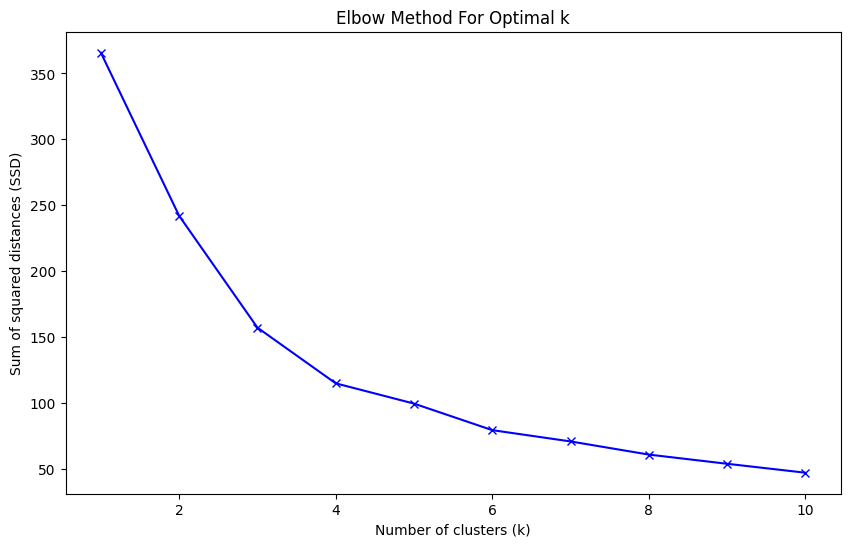

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Apply PCA and reduce to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Elbow Method to find the optimal number of clusters
ssd = []  # Sum of squared distances
K = range(1, 11)  # Number of clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(principal_components)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Assuming the optimal number of clusters from the elbow plot is 3 (adjust based on your plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=123)
clusters = kmeans.fit_predict(principal_components)



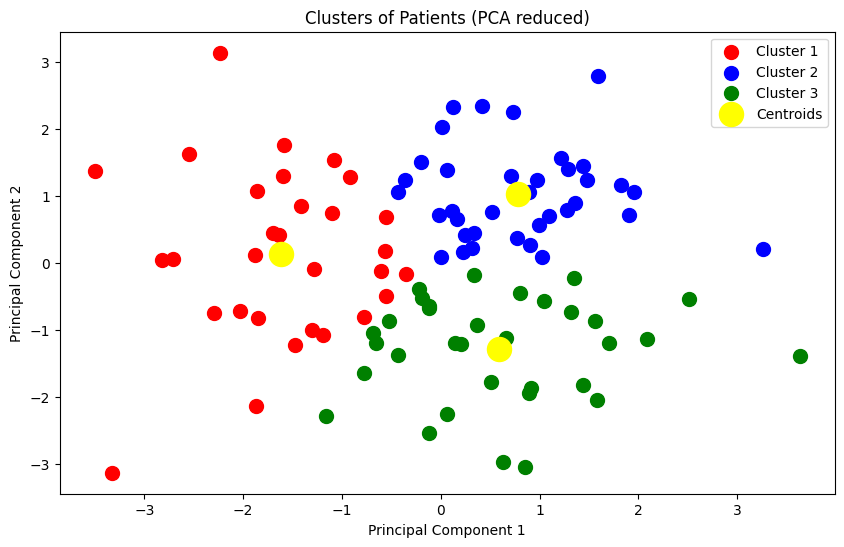

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
PC1  -0.347905  -0.123277  -0.251569   0.211110  -0.022526   0.403521   
PC2  -0.193767   0.390548  -0.369278   0.031968  -0.483023   0.101206   

     feature_6  feature_7  feature_8  feature_9  ...  feature_13  feature_14  \
PC1  -0.173898  -0.318541  -0.141952  -0.081143  ...   -0.023883   -0.130777   
PC2   0.028151   0.154758   0.341308   0.089125  ...    0.207945    0.216186   

     feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  \
PC1    0.098354    0.126726   -0.190452     0.19436   -0.134546    0.334897   
PC2    0.100119    0.039135    0.066311     0.00268    0.095281    0.021829   

     feature_21  feature_22  
PC1    0.080787   -0.116593  
PC2   -0.204911   -0.055932  

[2 rows x 23 columns]


In [9]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[clusters == 0, 0], principal_components[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(principal_components[clusters == 1, 0], principal_components[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(principal_components[clusters == 2, 0], principal_components[clusters == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Patients (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Viewing the PCA components (loadings)
pca_components = pca.components_
components_df = pd.DataFrame(pca_components, columns=data.columns, index=[f'PC{i+1}' for i in range(2)])
print(components_df)